In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets, transforms

In [41]:
# Convert input images to tensors and normalize
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))])

# Get the MNIST data from torchvision
dataset1 = datasets.MNIST('./', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('./', train=False,
                    transform=transform)

# Define the data loaders that will handle fetching of data
train_loader = torch.utils.data.DataLoader(dataset1, batch_size = 64)
test_loader = torch.utils.data.DataLoader(dataset2, batch_size = 14)


In [42]:
print(dataset1)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Correct label: 9


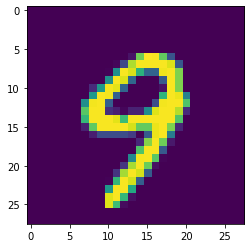

In [43]:
m = np.random.randint(1, 1000)

img = dataset1[m][0]
lbl = dataset1[m][1]

plt.imshow(img[0])
print(f"Correct label: {lbl}")

In [44]:
model = nn.Sequential(
    nn.Linear(784, 256),
    nn.Sigmoid(),
    nn.Linear(256, 64),
    nn.Sigmoid(),
    nn.Linear(64, 10)
)

In [57]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
batch_size = 128
epochs = 500

In [ ]:
for epoch in range(epochs):
    running_loss = 0.0
    for i, (batch_data, target) in enumerate(train_loader):
        # forward pass
        optimizer.zero_grad()
        batch_data = batch_data.view(batch_data.size(0), -1)
        pred_labels = model(batch_data)  # forward pass
        
        loss = criterion(pred_labels, target)
		
        loss.backward()

		# Update parameters
        optimizer.step()

		# Print progress
        running_loss += loss.item()
        
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}] Loss: {running_loss:.3f}")

print ("\n ### Finished Training ### \n")

Epoch [0] Loss: 2164.552
Epoch [10] Loss: 2071.297
Epoch [20] Loss: 1732.982
Epoch [30] Loss: 1264.742
Epoch [40] Loss: 950.619
Epoch [50] Loss: 753.464
Epoch [60] Loss: 623.621
Epoch [70] Loss: 535.791
Epoch [80] Loss: 475.198
Epoch [90] Loss: 431.985
Epoch [100] Loss: 400.104
Epoch [110] Loss: 375.784
Epoch [120] Loss: 356.604
Epoch [130] Loss: 340.989
Epoch [140] Loss: 327.903


## Let's test what we have got:

In [ ]:
m = np.random.randint(1, 1000)

img = dataset2[m][0]
lbl = dataset2[m][1]

plt.imshow(img[0])
with torch.no_grad():
    out = model.forward(img.view(img.size(0), -1)).float()

print(f"Correct label: {lbl}")
print(f"Prediction: {out}")